In [369]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
import scipy

In [370]:
players = pd.read_csv('../csv/players.csv')

### Step 1: Data Understanding ###
+ Dataframe shape
+ head 
+ dtypes
+ describe

In [371]:
players.shape

(30302, 23)

In [372]:
players.head()

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name
0,598,Timo,Hildebrand,Timo Hildebrand,2014,24,timo-hildebrand,Germany,Worms,Germany,...,NaN,NaN,NaN,10000000.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/timo-hildebran...,L1,Eintracht Frankfurt
1,670,Martin,Petrov,Martin Petrov,2012,714,martin-petrov,Bulgaria,Vratsa,Bulgaria,...,NaN,NaN,NaN,12000000.0,NaN,IFM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/martin-petrov/...,ES1,RCD Espanyol Barcelona
2,1323,Martin,Amedick,Martin Amedick,2012,24,martin-amedick,Germany,Paderborn,Germany,...,NaN,NaN,NaN,2750000.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/martin-amedick...,L1,Eintracht Frankfurt
3,3195,Jermaine,Pennant,Jermaine Pennant,2013,512,jermaine-pennant,England,Nottingham,England,...,right,173.0,NaN,10500000.0,NaN,Andrew Sky,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/jermaine-penna...,GB1,Stoke City
4,3259,Damien,Duff,Damien Duff,2013,931,damien-duff,Ireland,Ballyboden,Ireland,...,left,177.0,NaN,17000000.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/damien-duff/pr...,GB1,Fulham FC


In [373]:
players.columns

Index(['player_id', 'first_name', 'last_name', 'name', 'last_season',
       'current_club_id', 'player_code', 'country_of_birth', 'city_of_birth',
       'country_of_citizenship', 'date_of_birth', 'sub_position', 'position',
       'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date', 'agent_name',
       'image_url', 'url', 'current_club_domestic_competition_id',
       'current_club_name'],
      dtype='object')

In [374]:
players.dtypes

player_id                                 int64
first_name                               object
last_name                                object
name                                     object
last_season                               int64
current_club_id                           int64
player_code                              object
country_of_birth                         object
city_of_birth                            object
country_of_citizenship                   object
date_of_birth                            object
sub_position                             object
position                                 object
foot                                     object
height_in_cm                            float64
market_value_in_eur                     float64
highest_market_value_in_eur             float64
contract_expiration_date                 object
agent_name                               object
image_url                                object
url                                     

+ player_id: A unique identifier for each player.
+ first_name: The first name of the player.
+ last_name: The last name of the player.
+ name: The full name of the player, consisting of first name and last name.
+ last_season: The last season in which the player played.
+ current_club_id: A unique identifier for the current club of the player.
+ player_code: A code or abbreviation representing the player.
+ country_of_birth: The country of birth of the player.
+ city_of_birth: The city of birth of the player.
+ country_of_citizenship: The country of citizenship of the player.
+ date_of_birth: The date of birth of the player.
+ sub_position: The specific position of the player on the field.
+ position: The main playing position of the player on the field.
+ foot: The dominant foot of the player (right, left etc...)
+ height_in_cm: The height of the player in centimeters.
+ market_value_in_eur: The current market value of the player in Euros.
+ highest_market_value_in_eur: The highest market value ever reached by the player in Euros.
+ contract_expiration_date: The expiration date of the player's contract.
+ agent_name: The name of the player's agent.
+ image_url: The URL of the player's image.
+ url: The URL link to access more information about the player.
+ current_club_domestic_competition_id: A unique identifier for the domestic competition of the player's current club.
+ current_club_name: The full name of the player's current club.

In [375]:
players.describe

<bound method NDFrame.describe of        player_id first_name    last_name                name  last_season  \
0            598       Timo   Hildebrand     Timo Hildebrand         2014   
1            670     Martin       Petrov       Martin Petrov         2012   
2           1323     Martin      Amedick      Martin Amedick         2012   
3           3195   Jermaine      Pennant    Jermaine Pennant         2013   
4           3259     Damien         Duff         Damien Duff         2013   
...          ...        ...          ...                 ...          ...   
30297     371851       Jaka        Bijol          Jaka Bijol         2023   
30298     537171     Semuel  Pizzignacco  Semuel Pizzignacco         2018   
30299     586756      Festy      Ebosele       Festy Ebosele         2023   
30300     704692     Nicolò      Cocetta      Nicolò Cocetta         2022   
30301     925584       Axel     Guessand       Axel Guessand         2023   

       current_club_id         player_cod

### Step 2: Data Preperation ###
+ Dropping irrelevant columns and rows
+ Identifying duplicated columns
+ Feature Creation
+ Casting dtypes
+ Adding new columns

In [376]:
new_players = players[['player_id', 'name', 'last_season',
       'current_club_id', 'country_of_birth', 'city_of_birth',
       'country_of_citizenship', 'date_of_birth', 'sub_position', 'position',
       'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date', 'agent_name', 'current_club_domestic_competition_id',
       'current_club_name']].copy()

In [377]:
new_players.shape

(30302, 18)

In [378]:
null_counts = players.isna().sum()
null_counts

player_id                                   0
first_name                               1965
last_name                                   0
name                                        0
last_season                                 0
current_club_id                             0
player_code                                 0
country_of_birth                         2689
city_of_birth                            2203
country_of_citizenship                    543
date_of_birth                              47
sub_position                              172
position                                    0
foot                                     2389
height_in_cm                             2098
market_value_in_eur                     10919
highest_market_value_in_eur              1321
contract_expiration_date                11467
agent_name                              15361
image_url                                   0
url                                         0
current_club_domestic_competition_

In [379]:
mean_columns = players['market_value_in_eur'].mean()
mean_columns

2234721.405355208

In [380]:
new_players['market_value_in_eur'].fillna(0, inplace=True)
new_players['highest_market_value_in_eur'].fillna(0, inplace=True)
new_players['foot'].fillna('unknown', inplace=True)
new_players['position'].fillna('unknown', inplace=True)
new_players['sub_position'].fillna('unknown', inplace=True)

In [381]:
new_players.loc[new_players.duplicated()]

,player_id,name,last_season,current_club_id,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,current_club_domestic_competition_id,current_club_name


In [382]:
new_players.loc[new_players.duplicated(subset=['name'])]

,player_id,name,last_season,current_club_id,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,current_club_domestic_competition_id,current_club_name
593,192360,Ryan Edwards,2019,43,Singapore,Singapur,Australia,1993-11-17,Central Midfield,Midfield,right,175.0,300000.0,450000.0,2023-06-30 00:00:00,NaN,SC1,Heart of Midlothian FC
1623,29364,João Moutinho,2023,1075,Portugal,Portimão,Portugal,1986-09-08,Central Midfield,Midfield,right,170.0,1500000.0,30000000.0,2024-06-30 00:00:00,Gestifute,PO1,SC Braga
1814,279975,Aleksandr Maksimenko,2017,3690,Russia,Khabarovsk,Russia,1996-03-22,Centre-Forward,Attack,right,170.0,75000.0,150000.0,NaN,NaN,RU1,SKA Khabarovsk
1911,711628,Pablo Pérez,2022,368,Spain,Madrid,Spain,2001-08-18,Left-Back,Defender,left,174.0,200000.0,200000.0,2024-06-30 00:00:00,YOU FIRST,ES1,Sevilla FC
1932,949113,Pape Diop,2022,3508,Senegal,Ouakam,Senegal,2003-09-04,Central Midfield,Midfield,right,182.0,300000.0,400000.0,2024-06-30 00:00:00,BMG,BE1,SV Zulte Waregem
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30181,461895,Diogo Sousa,2021,589,Portugal,Albufeira,Portugal,1998-09-16,Goalkeeper,Goalkeeper,right,198.0,300000.0,300000.0,2023-06-30 00:00:00,NaN,TR1,Antalyaspor
30187,668268,Marquinhos,2023,995,Brazil,São Paulo,Brazil,2003-04-07,Right Winger,Attack,left,175.0,10000000.0,12000000.0,2024-06-30 00:00:00,OTB Sports,FR1,FC Nantes
30193,17374,Maurício,2012,4750,Brazil,Passo Fundo,Brazil,1976-07-05,Centre-Back,Defender,right,192.0,0.0,1100000.0,NaN,NaN,PO1,SC Olhanense
30219,127828,Diego Rodríguez,2012,410,Uruguay,Montevideo,Uruguay,1989-09-04,Defensive Midfield,Midfield,right,170.0,200000.0,2000000.0,2023-06-30 00:00:00,NaN,IT1,Udinese Calcio


In [383]:
specific_players = new_players[new_players['name'] == 'João Teixeira']
specific_players

,player_id,name,last_season,current_club_id,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,current_club_domestic_competition_id,current_club_name
932,344893,João Teixeira,2019,18303,France,Forbach,Portugal,1996-05-07,Central Midfield,Midfield,right,182.0,25000.0,350000.0,NaN,NaN,UKR1,FK Oleksandriya
2388,182710,João Teixeira,2022,3325,Portugal,Seixal,Portugal,1994-02-06,Attacking Midfield,Midfield,right,178.0,900000.0,1000000.0,NaN,MadeinFootball,PO1,GD Chaves


In [384]:
new_players.loc[new_players.duplicated(subset=['date_of_birth'])]

,player_id,name,last_season,current_club_id,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,current_club_domestic_competition_id,current_club_name
25,6020,Francesco Tavano,2014,749,Italy,Caserta,Italy,1979-03-02,Centre-Forward,Attack,right,173.0,0.0,8500000.0,NaN,Gea World,IT1,FC Empoli
111,29178,Nino,2020,1531,Spain,Almería,Spain,1980-06-10,Centre-Forward,Attack,right,169.0,0.0,4000000.0,NaN,NaN,ES1,Elche CF
114,29494,Hakan Balta,2017,141,Germany,Berlin,Turkey,1983-03-23,Left-Back,Defender,left,184.0,0.0,6500000.0,NaN,Foot & Ball,TR1,Galatasaray
148,37722,Aykut Demir,2016,2944,Netherlands,Bergen op Zoom,Turkey,1988-10-22,Centre-Back,Defender,right,182.0,50000.0,5750000.0,2024-06-30 00:00:00,Ince,TR1,Ankaraspor
180,43982,Shlomi Arbeitman,2013,1411,Israel,Netanya,Israel,1985-05-14,Centre-Forward,Attack,right,184.0,0.0,1500000.0,NaN,NaN,BE1,RAEC Mons (- 2015)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30297,371851,Jaka Bijol,2023,410,Slovenia,Vuzenica,Slovenia,1999-02-05,Centre-Back,Defender,right,190.0,10000000.0,10000000.0,2027-06-30 00:00:00,MSC GROUP,IT1,Udinese Calcio
30298,537171,Semuel Pizzignacco,2018,410,Italy,Monfalcone,Italy,2001-09-01,Goalkeeper,Goalkeeper,right,188.0,325000.0,350000.0,2025-06-30 00:00:00,NaN,IT1,Udinese Calcio
30299,586756,Festy Ebosele,2023,410,Ireland,"Enniscorthy, Wexford",Ireland,2002-08-02,Right Midfield,Midfield,right,180.0,4500000.0,4500000.0,2027-06-30 00:00:00,The Kulture Group,IT1,Udinese Calcio
30300,704692,Nicolò Cocetta,2022,410,Italy,San Daniele del Friuli,Italy,2003-12-19,Centre-Back,Defender,unknown,NaN,75000.0,75000.0,2023-06-30 00:00:00,NaN,IT1,Udinese Calcio


In [385]:
duplicate_players = new_players[new_players.duplicated(subset=['name', 'date_of_birth'], keep=False)]
duplicate_players

,player_id,name,last_season,current_club_id,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,current_club_domestic_competition_id,current_club_name
6680,461923,João Ricciulli,2022,2420,NaN,Bissau,NaN,1999-10-10,Centre-Back,Defender,right,195.0,0.0,100000.0,2023-06-30 00:00:00,NaN,PO1,Vitória Guimarães SC
19392,398057,João Ricciulli,2018,1038,Guinea-Bissau,Bissau,Guinea-Bissau,1999-10-10,Left Winger,Attack,right,183.0,0.0,100000.0,NaN,Evlon Sports & Mgmt,IT1,UC Sampdoria


<h3> This player is the same, so we only need to keep the most up-to-date tuple </h3>

In [386]:
new_players = new_players[new_players['player_id'] != 398057]

In [387]:
new_players.loc[new_players.duplicated(subset=['highest_market_value_in_eur'])]

,player_id,name,last_season,current_club_id,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,current_club_domestic_competition_id,current_club_name
10,4219,David Fox,2013,1123,England,Leek,England,1983-12-13,Central Midfield,Midfield,right,175.0,0.0,2000000.0,NaN,Full Contact,GB1,Norwich City
15,4796,Kader Mangane,2017,667,Senegal,Thiès,Senegal,1983-03-23,Centre-Back,Defender,right,193.0,0.0,7000000.0,NaN,NaN,FR1,RC Strasbourg Alsace
16,4873,Armand Deumi,2012,1506,Cameroon,Douala,Cameroon,1979-03-12,Centre-Back,Defender,right,180.0,0.0,2000000.0,NaN,Hikmet Dagci,TR1,Kardemir Karabükspor
18,5672,Étienne Didot,2018,855,France,Paimpol,France,1983-07-24,Central Midfield,Midfield,right,175.0,0.0,7000000.0,NaN,NaN,FR1,EA Guingamp
19,5712,Bertrand Robert,2012,1091,Réunion,Saint-Benoît,Réunion,1983-11-16,Left-Back,Defender,left,174.0,0.0,800000.0,NaN,NaN,GR1,PAOK Thessaloniki
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30297,371851,Jaka Bijol,2023,410,Slovenia,Vuzenica,Slovenia,1999-02-05,Centre-Back,Defender,right,190.0,10000000.0,10000000.0,2027-06-30 00:00:00,MSC GROUP,IT1,Udinese Calcio
30298,537171,Semuel Pizzignacco,2018,410,Italy,Monfalcone,Italy,2001-09-01,Goalkeeper,Goalkeeper,right,188.0,325000.0,350000.0,2025-06-30 00:00:00,NaN,IT1,Udinese Calcio
30299,586756,Festy Ebosele,2023,410,Ireland,"Enniscorthy, Wexford",Ireland,2002-08-02,Right Midfield,Midfield,right,180.0,4500000.0,4500000.0,2027-06-30 00:00:00,The Kulture Group,IT1,Udinese Calcio
30300,704692,Nicolò Cocetta,2022,410,Italy,San Daniele del Friuli,Italy,2003-12-19,Centre-Back,Defender,unknown,NaN,75000.0,75000.0,2023-06-30 00:00:00,NaN,IT1,Udinese Calcio


In [388]:
new_players['height_in_cm'].describe()

count    28203.000000
mean       182.234550
std          6.834036
min         18.000000
25%        178.000000
50%        182.000000
75%        187.000000
max        207.000000
Name: height_in_cm, dtype: float64

In [389]:
height_mean = new_players['height_in_cm'].mean()
new_players['height_in_cm'].fillna(height_mean, inplace=True)

In [390]:
players.shape

(30302, 23)

In [391]:
players['height_in_cm'].describe()


count    28204.000000
mean       182.234577
std          6.833916
min         18.000000
25%        178.000000
50%        182.000000
75%        187.000000
max        207.000000
Name: height_in_cm, dtype: float64

<h1> Casting dtypes </h3>

In [392]:
new_players.dtypes

player_id                                 int64
name                                     object
last_season                               int64
current_club_id                           int64
country_of_birth                         object
city_of_birth                            object
country_of_citizenship                   object
date_of_birth                            object
sub_position                             object
position                                 object
foot                                     object
height_in_cm                            float64
market_value_in_eur                     float64
highest_market_value_in_eur             float64
contract_expiration_date                 object
agent_name                               object
current_club_domestic_competition_id     object
current_club_name                        object
dtype: object

In [393]:
# The columns 'date_of_birth' and 'contract_expiration_date' were converted to the 'datetime' type.
new_players['date_of_birth'] = pd.to_datetime(new_players['date_of_birth'], errors='coerce')
new_players['contract_expiration_date'] = pd.to_datetime(new_players['contract_expiration_date'], errors='coerce')
new_players.dtypes

player_id                                        int64
name                                            object
last_season                                      int64
current_club_id                                  int64
country_of_birth                                object
city_of_birth                                   object
country_of_citizenship                          object
date_of_birth                           datetime64[ns]
sub_position                                    object
position                                        object
foot                                            object
height_in_cm                                   float64
market_value_in_eur                            float64
highest_market_value_in_eur                    float64
contract_expiration_date                datetime64[ns]
agent_name                                      object
current_club_domestic_competition_id            object
current_club_name                               object
dtype: obj

<h1> Inspect data </h1>

In [394]:
# checking if player_id column is unique
player_id_unique = new_players['player_id'].is_unique
player_id_unique

True

In [395]:
# checking if different values for column last_season are correct
seasons = new_players['last_season'].unique()
seasons.sort()
seasons

array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023], dtype=int64)

In [396]:
new_players['foot'].unique()

array(['unknown', 'right', 'left', 'both'], dtype=object)

<h1> Adding new columns </h1>

In [397]:
# Added an 'is_active' column that indicates whether players are still active, using a criterion where a player is considered active if they have played in at least the last three seasons. The 'market_value_fluctuation' represents the market value change between the highest value reached and the current value. If the current value is zero because the player is no longer active, then the fluctuation will correspond to the highest market value achieved.
current_year = datetime.now().year
years_considered_active = 3
new_players['is_active'] = (current_year - new_players['last_season']) <= years_considered_active
new_players['market_value_fluctuation'] = (new_players['highest_market_value_in_eur'] - new_players['market_value_in_eur']) / 1_000_000

new_players

,player_id,name,last_season,current_club_id,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,current_club_domestic_competition_id,current_club_name,is_active,market_value_fluctuation
0,598,Timo Hildebrand,2014,24,Germany,Worms,Germany,1979-04-05,Goalkeeper,Goalkeeper,unknown,182.23455,0.0,10000000.0,NaT,NaN,L1,Eintracht Frankfurt,False,10.000
1,670,Martin Petrov,2012,714,Bulgaria,Vratsa,Bulgaria,1979-01-15,Left Winger,Attack,unknown,182.23455,0.0,12000000.0,NaT,IFM,ES1,RCD Espanyol Barcelona,False,12.000
2,1323,Martin Amedick,2012,24,Germany,Paderborn,Germany,1982-09-06,Centre-Back,Defender,unknown,182.23455,0.0,2750000.0,NaT,NaN,L1,Eintracht Frankfurt,False,2.750
3,3195,Jermaine Pennant,2013,512,England,Nottingham,England,1983-01-15,Right Winger,Attack,right,173.00000,0.0,10500000.0,NaT,Andrew Sky,GB1,Stoke City,False,10.500
4,3259,Damien Duff,2013,931,Ireland,Ballyboden,Ireland,1979-03-02,Right Midfield,Midfield,left,177.00000,0.0,17000000.0,NaT,NaN,GB1,Fulham FC,False,17.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30297,371851,Jaka Bijol,2023,410,Slovenia,Vuzenica,Slovenia,1999-02-05,Centre-Back,Defender,right,190.00000,10000000.0,10000000.0,2027-06-30,MSC GROUP,IT1,Udinese Calcio,True,0.000
30298,537171,Semuel Pizzignacco,2018,410,Italy,Monfalcone,Italy,2001-09-01,Goalkeeper,Goalkeeper,right,188.00000,325000.0,350000.0,2025-06-30,NaN,IT1,Udinese Calcio,False,0.025
30299,586756,Festy Ebosele,2023,410,Ireland,"Enniscorthy, Wexford",Ireland,2002-08-02,Right Midfield,Midfield,right,180.00000,4500000.0,4500000.0,2027-06-30,The Kulture Group,IT1,Udinese Calcio,True,0.000
30300,704692,Nicolò Cocetta,2022,410,Italy,San Daniele del Friuli,Italy,2003-12-19,Centre-Back,Defender,unknown,182.23455,75000.0,75000.0,2023-06-30,NaN,IT1,Udinese Calcio,True,0.000


In [398]:
new_players['market_value_billion'] = new_players['market_value_in_eur'] / 1_000_000

In [399]:
new_players['highest_market_value_billion'] = new_players['highest_market_value_in_eur'] / 1_000_000

In [400]:
current_date = datetime.now()
new_players['age'] = new_players['date_of_birth'].apply(lambda dob: (current_date - dob).days // 365 if pd.notnull(dob) else None)

### Step 3: Feature Understanding ###
+ My questions
    + What is the average age of the players in the CSV file?
    + What is the distribution of preferred foot among the players?
    + At what age is the highest market value reached? And what is the age difference compared to the average age once the highest market value is reached?
    + What are the positions of the players present in the file?
    + Are there any outliers in the height of the players?
    + Does the market value of the players fluctuate more among active or inactive players?
+ Plotting Feature Distributions
       + Histogram
       + Bar Chart
       + Boxplot
       + Scatterplot
       + HeatMap

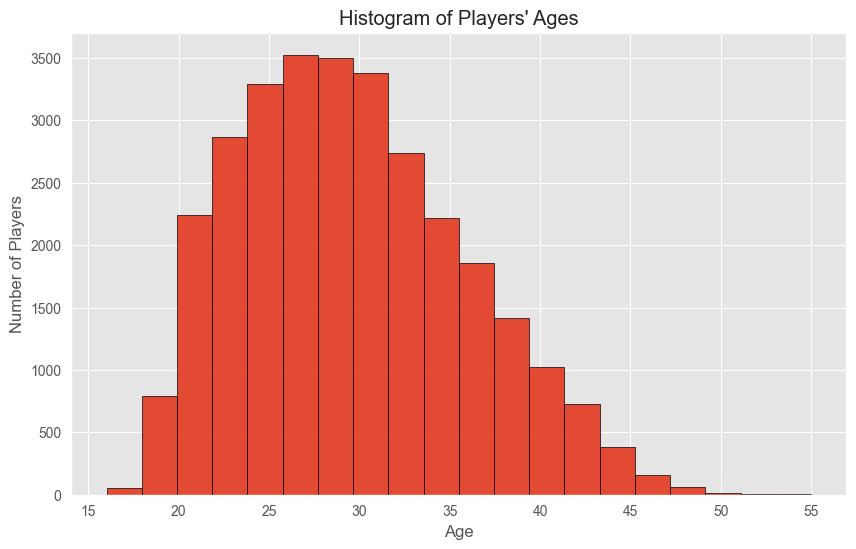

In [401]:
#The majority of players listed in the CSV file are between the ages of 25 and 30.
plt.figure(figsize=(10, 6))
new_players['age'].hist(bins=20, edgecolor='black')
plt.title('Histogram of Players\' Ages')
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.grid(True)
plt.show()

In [402]:
new_players['foot'].unique()

array(['unknown', 'right', 'left', 'both'], dtype=object)

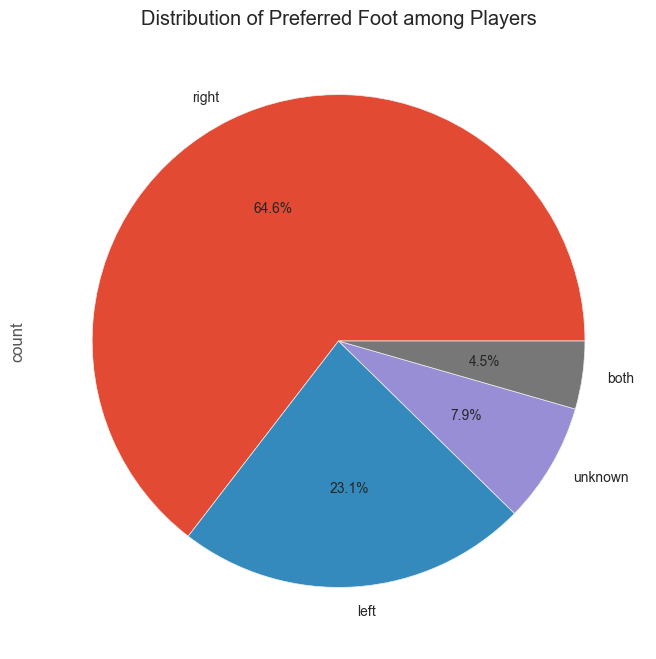

In [403]:
foot_counts = new_players['foot'].value_counts()
plt.figure(figsize=(8, 8))
foot_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Preferred Foot among Players')
plt.show()

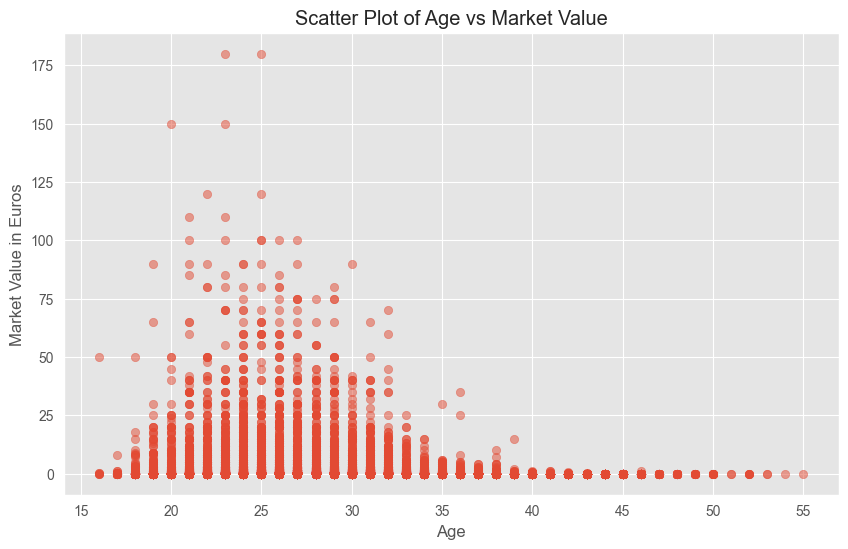

In [404]:
#The highest market values are for players aged between 20 and 30 years old.
plt.figure(figsize=(10, 6))
plt.scatter(new_players['age'], new_players['market_value_billion'], alpha=0.5)
plt.title('Scatter Plot of Age vs Market Value')
plt.xlabel('Age')
plt.ylabel('Market Value in Euros')
plt.grid(True)
plt.show()

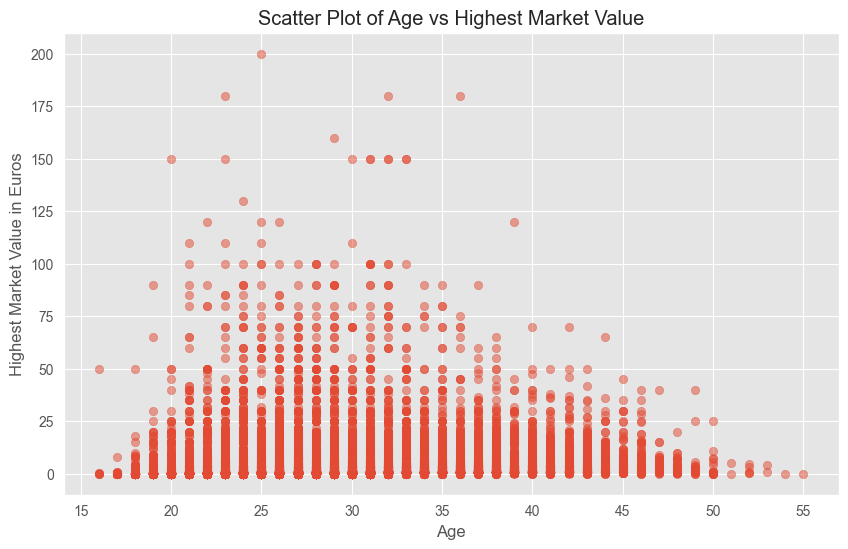

In [405]:
#The maximum market value tends to be higher for players aged between 25 and 35 years old. This is because a player's market value typically increases with experience.
plt.figure(figsize=(10, 6))
plt.scatter(new_players['age'], new_players['highest_market_value_billion'], alpha=0.5)
plt.title('Scatter Plot of Age vs Highest Market Value')
plt.xlabel('Age')
plt.ylabel('Highest Market Value in Euros')
plt.grid(True)
plt.show()

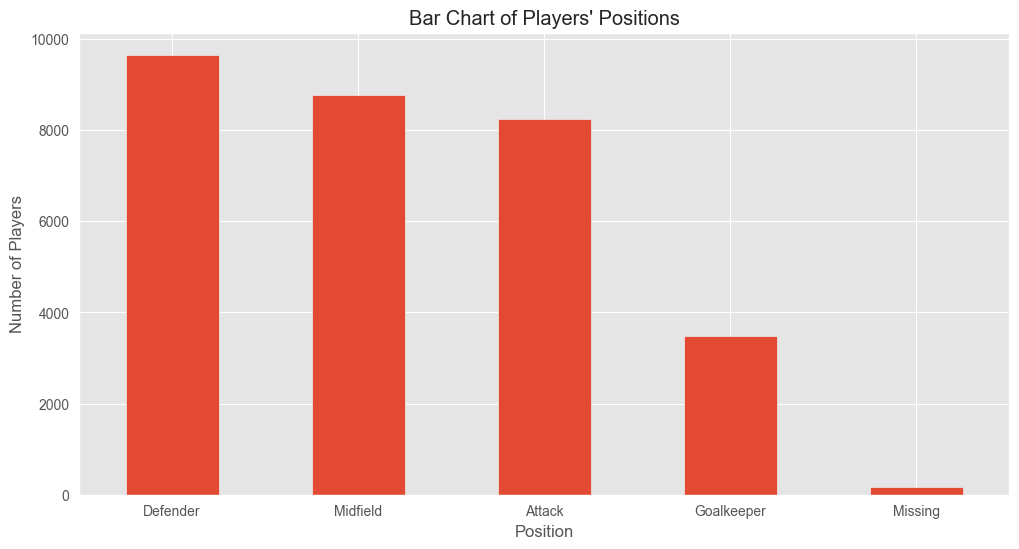

In [406]:
position_counts = new_players['position'].value_counts()
plt.figure(figsize=(12, 6))
position_counts.plot(kind='bar')
plt.title('Bar Chart of Players\' Positions')
plt.xlabel('Position')
plt.ylabel('Number of Players')
plt.grid(True)
plt.xticks(rotation=360)
plt.show()

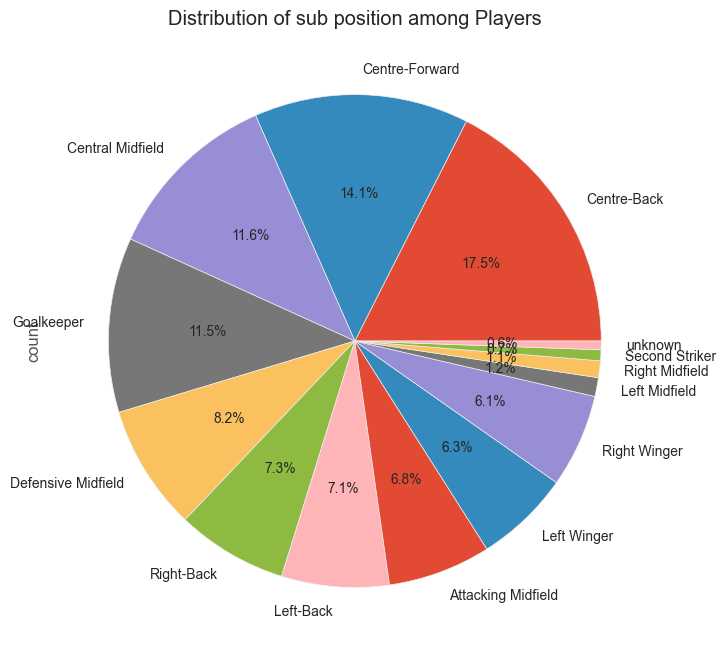

In [407]:
sub_position_counts = new_players['sub_position'].value_counts()

plt.figure(figsize=(8, 8))
sub_position_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of sub position among Players')
plt.show()

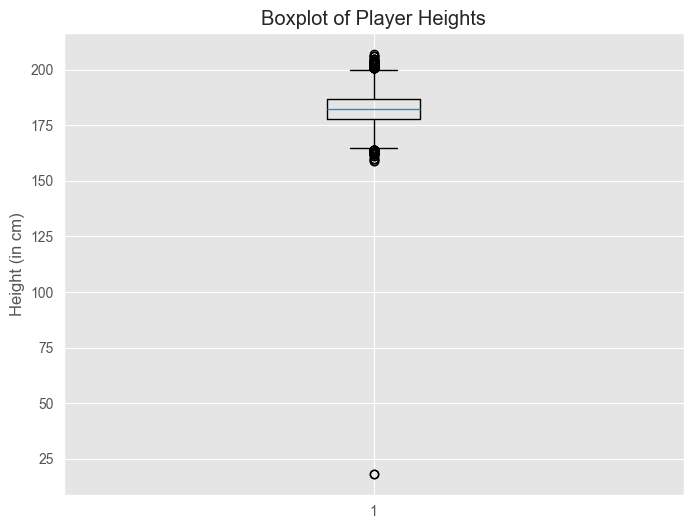

In [408]:
#From the box plot, it's evident that there are some outliers in the players' height data. While heights of 200cm and 150cm are still extreme values but within the realm of possibility, a value below 25cm could likely be an error.
plt.figure(figsize=(8, 6))
plt.boxplot(new_players['height_in_cm'].dropna())  
plt.title('Boxplot of Player Heights')
plt.ylabel('Height (in cm)')
plt.show()

In [409]:
height_outliers = new_players[new_players['height_in_cm'] > 200]
height_outliers

,player_id,name,last_season,current_club_id,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,...,highest_market_value_in_eur,contract_expiration_date,agent_name,current_club_domestic_competition_id,current_club_name,is_active,market_value_fluctuation,market_value_billion,highest_market_value_billion,age
208,47609,Goran Blazevic,2014,1186,Jugoslawien (SFR),Split,Croatia,1986-06-07,Goalkeeper,Goalkeeper,...,2000000.0,NaT,Argon Sport,RU1,Torpedo Moscow,False,2.00,0.000,2.000,37.0
765,263065,Marijan Coric,2014,130,Bosnia-Herzegovina,Čapljina,Croatia,1995-02-06,Goalkeeper,Goalkeeper,...,100000.0,2024-06-30,Majstro Sports,IT1,Parma Calcio 1913,False,0.00,0.100,0.100,29.0
1756,123296,Mads Petersen,2013,20100,NaN,NaN,Denmark,1991-09-18,Goalkeeper,Goalkeeper,...,100000.0,NaT,NaN,DK1,FC Vestsjaelland,False,0.10,0.000,0.100,32.0
2500,226194,Fejsal Mulic,2016,29228,Yugoslavia (Republic),Novi Pazar,Serbia,1994-10-03,Centre-Forward,Attack,...,750000.0,2024-12-31,NaN,BE1,Royal Excel Mouscron (-2022),False,0.05,0.700,0.750,29.0
2572,257474,Vanja Milinković-Savić,2023,416,Spain,Ourense,Serbia,1997-02-20,Goalkeeper,Goalkeeper,...,6000000.0,2026-06-30,DOO Magnum,IT1,Torino FC,True,0.00,6.000,6.000,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27030,532824,Dan Langley,2020,762,England,Newcastle upon Tyne,England,2000-12-28,Goalkeeper,Goalkeeper,...,250000.0,2023-05-31,CAA Base Ltd,GB1,Newcastle United,False,0.25,0.000,0.250,23.0
27137,607133,Kevin Gadellaa,2022,200,NaN,Zaandijk,NaN,2003-04-08,Goalkeeper,Goalkeeper,...,175000.0,2024-06-30,Grand Stand,NL1,FC Utrecht,True,0.00,0.175,0.175,21.0
28278,150212,Ross Laidlaw,2023,2759,Scotland,Livingston,Scotland,1992-07-12,Goalkeeper,Goalkeeper,...,400000.0,2026-05-31,NaN,SC1,Ross County FC,True,0.05,0.350,0.400,31.0
28750,386062,Simon Lefebvre,2015,40,France,Tarbes,France,1997-05-06,Goalkeeper,Goalkeeper,...,150000.0,NaT,NaN,FR1,FC Girondins Bordeaux,False,0.15,0.000,0.150,27.0


In [410]:
height_outliers = new_players[new_players['height_in_cm'] < 25]
height_outliers

,player_id,name,last_season,current_club_id,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,...,highest_market_value_in_eur,contract_expiration_date,agent_name,current_club_domestic_competition_id,current_club_name,is_active,market_value_fluctuation,market_value_billion,highest_market_value_billion,age
6846,592398,Aïssa Boudechicha,2021,40,NaN,Medjana,Algeria,2000-04-13,Left-Back,Defender,...,150000.0,2023-06-30,NaN,FR1,FC Girondins Bordeaux,True,0.0,0.15,0.15,24.0
8716,628490,Genar Fornés,2021,2687,Spain,Barcelona,Spain,2000-01-17,Left-Back,Defender,...,150000.0,2023-06-30,Proneo Sports S.L.,ES1,Cádiz CF,True,0.0,0.15,0.15,24.0


In [411]:
# Correcting the height values for the specified player_ids by setting them to NaN
outlier_player_ids = [592398, 628490]
new_players.loc[new_players['player_id'].isin(outlier_player_ids), 'height_in_cm'] = None
corrected_rows = new_players[new_players['player_id'].isin(outlier_player_ids)]
corrected_rows

,player_id,name,last_season,current_club_id,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,...,highest_market_value_in_eur,contract_expiration_date,agent_name,current_club_domestic_competition_id,current_club_name,is_active,market_value_fluctuation,market_value_billion,highest_market_value_billion,age
6846,592398,Aïssa Boudechicha,2021,40,NaN,Medjana,Algeria,2000-04-13,Left-Back,Defender,...,150000.0,2023-06-30,NaN,FR1,FC Girondins Bordeaux,True,0.0,0.15,0.15,24.0
8716,628490,Genar Fornés,2021,2687,Spain,Barcelona,Spain,2000-01-17,Left-Back,Defender,...,150000.0,2023-06-30,Proneo Sports S.L.,ES1,Cádiz CF,True,0.0,0.15,0.15,24.0


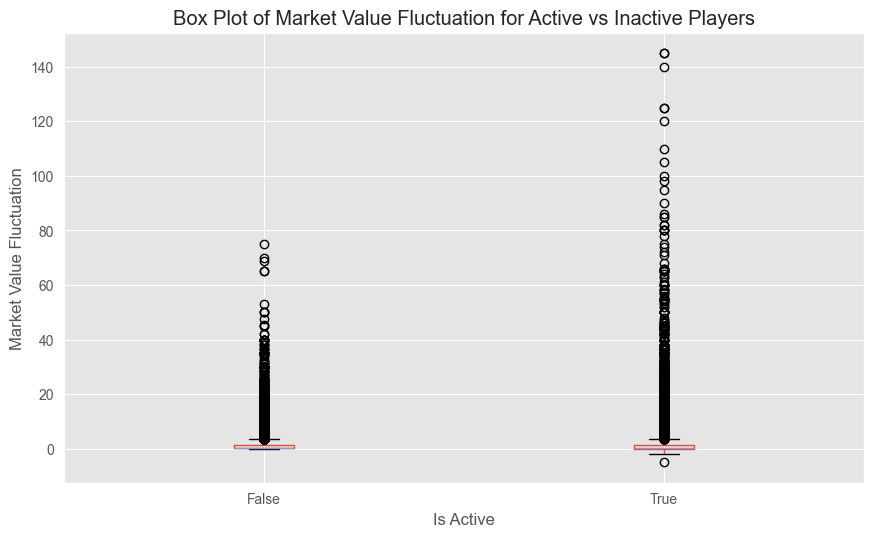

In [412]:
#Active players tend to experience more significant fluctuations in market value because they are still active and subject to changes in their performance, contractual status, and the market itself. On the other hand, inactive players have fewer market fluctuations because their value tends to stabilize once they end their professional careers.
new_players.boxplot(by='is_active', column='market_value_fluctuation', figsize=(10, 6))
plt.title('Box Plot of Market Value Fluctuation for Active vs Inactive Players')
plt.suptitle('') 
plt.xlabel('Is Active')
plt.ylabel('Market Value Fluctuation')
plt.show()

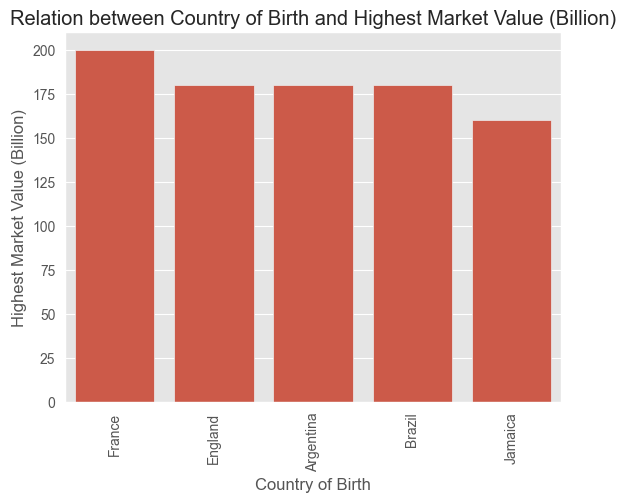

In [413]:
top_countr = new_players.sort_values(by = 'highest_market_value_billion', ascending = False).head(5)
sns.barplot(x='country_of_birth', y='highest_market_value_billion', data=top_countr)
plt.title('Relation between Country of Birth and Highest Market Value (Billion)')
plt.xlabel('Country of Birth')
plt.ylabel('Highest Market Value (Billion)')
plt.xticks(rotation=90)  
plt.show()


<Axes: >

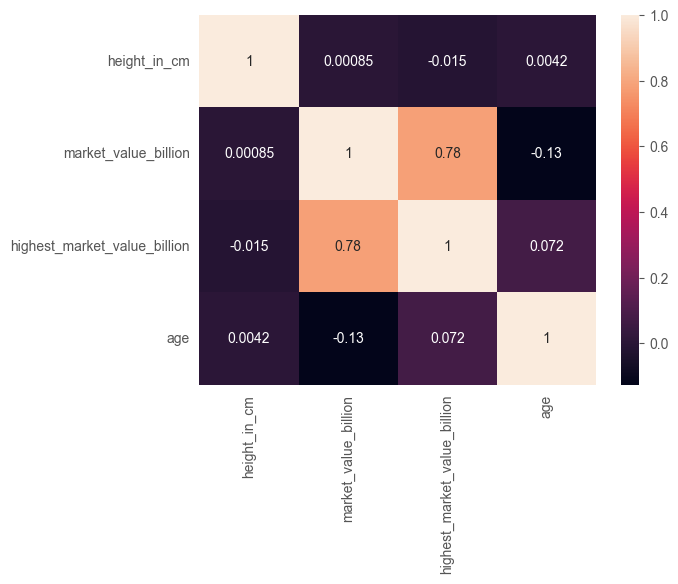

In [414]:
# There is a strong correlation between the current market value and the maximum value reached by the player. Additionally, there is a low correlation between the player's height and their market value.

sns.heatmap(new_players[['height_in_cm', 'market_value_billion', 'highest_market_value_billion', 'age']].corr(), annot=True)